# <u>TP 1 VISION PAR ORDINATEUR<u>
   

In [ ]:
#### <u> Yasmine LOUKILI<u>

In [1]:
#Importation de tous les module dont nous aurons besoin.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import math
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage.transform import resize


#### <u> Partie a) : Segmentation de l’image initiale de travail, en 3 parties<u>

On commence par lire l'image, et l'afficher

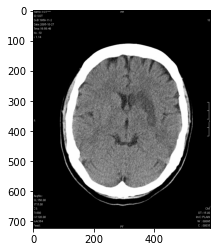

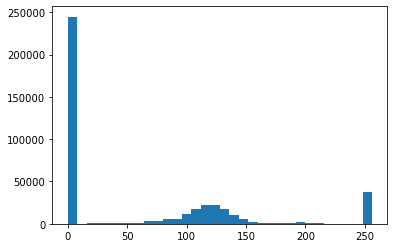

In [2]:
#Lecture de l'image
img = mpimg.imread('C:/Users/evanb/Downloads/CT_SubCortInf.jpg')

#Affichage de l'image
plt.imshow(img)
plt.show()

#Construction de l'histogramme des pixels pour l'image
image=img[...,1]
fig,ax=plt.subplots(1,1)
I=ax.hist(image.ravel(),bins=32,range=[0,256])

Ensuite nous voulons afficher les trois parties de l'image initiale: La tête entière, la boite cranienne, le Cerveau seul

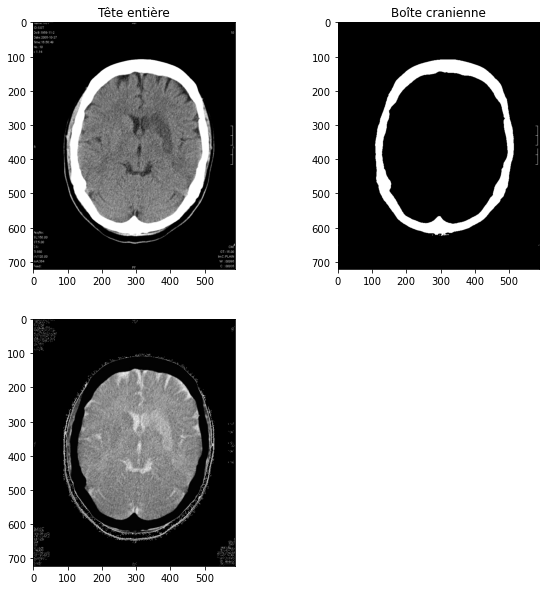

In [3]:
#Affichage de l'image de la tête entière en noir et blanc
plt.figure(figsize=(10, 10)) #figsize permet de changer les dimensions du graph
plt.subplot(2,2,1) #creer un subplot
plt.title("Tête entière")
plt.imshow(image, cmap = "gray")

#Affichage de l'image de la boîte cranienne en noir et blanc
#Boîte prend les pixels blancs de l'image de la tête entiere
boite = (image > 240)
plt.subplot(2,2,2)
plt.title("Boîte cranienne")
plt.imshow(boite, cmap = "gray")

#Cerveau prend l'image de la tete entiere en enlevant le boite cranienne.
#Affichage du Cerveau en noir et blanc
Cerveau=boite-image
plt.subplot(2,2,3)
plt.imshow(Cerveau, cmap = "gray")

On remarque que l'image du cerveau seul n'est pas optimal, en effet, on remarque un contour qui ne correspond vraisemblablement pas au Cerveau.

De ce fait, nous allons réaliser un masque qui correspondra seulement au Cerveau.

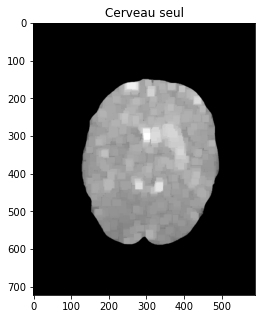

In [16]:
#On effectue une ouverture qui permettra d'avoir le masque pour filtrer l'image du cerveau.

kernel_size=15
iterations=1
kernel = np.ones((kernel_size,kernel_size),np.uint8)

C=cv2.morphologyEx(Cerveau, cv2.MORPH_OPEN, kernel, iterations=iterations)

plt.figure(figsize=(5, 5))

plt.title("Cerveau seul")
plt.imshow(C,cmap="gray")
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


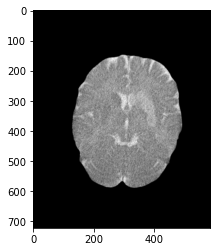

In [5]:
print(C)
for i in range(len(C)):
    for j in range (len(C[i])):
        if C[i,j]<20:
            Cerveau[i,j]=0
mask=Cerveau            
plt.imshow(Cerveau,cmap='gray')
                


In [1]:
Y=[]
X=[]
regions = regionprops(Cerveau) #contiendra une liste de propriétés pour chaque région détectée dans l'image
#boucle sur les régions pour extraire les centroids :

for props in regions:
    
    y0, x0 = props.centroid
    if math.isnan(y0)==False:
        Y.append(y0)
    if math.isnan(x0)==False: 
        X.append(x0)
#calcul de la moyenne des coordonnées :
Y=np.mean(Y)
X=np.mean(X)
#trouve le point moyen de ces centroids
x=np.linspace(0,400,2)
y=-11*x+3840

plt.plot(x, y, color="red", linewidth=1)
plt.plot(X,Y, marker=".", color="red")
plt.imshow(cerveau,cmap='gray')

NameError: name 'regionprops' is not defined

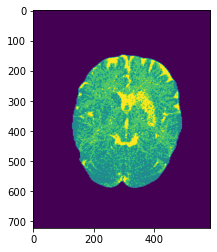

In [7]:
#%matplotlib inline
 
# Read in the image

 
#change color to RGB (from BGR)
mask = cv2.cvtColor(Cerveau, cv2.COLOR_BGR2RGB)
 
#reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = Cerveau.reshape((-1,3))
 
#convert to float type
pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
#perform k-means clustering wit h number of clusters defined as 3
k = 4
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
#convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
#reshape data into the original image dimensions
segmented_image = segmented_data.reshape((Cerveau.shape))
 
#plt.imshow(segmented_image)
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]<20:
            segmented_image[i,j]=0
        elif segmented_image[i,j]<140 and segmented_image[i,j]>=100:
            segmented_image[i,j]=120
        elif segmented_image[i,j]<180 and segmented_image[i,j]>=140:
            segmented_image[i,j]=179
        elif segmented_image[i,j]<200 and segmented_image[i,j]>=180:
            segmented_image[i,j]=250
            
S=segmented_image

plt.imshow(S)

    

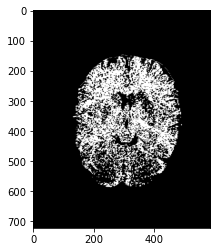

In [8]:
U=np.arctan(11)

segmented_data = centers[labels.flatten()]
 
#reshape data into the original image dimensions
segmented_image = segmented_data.reshape((Cerveau.shape))
 
#plt.imshow(segmented_image)
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]<20:
            segmented_image[i,j]=0
        elif segmented_image[i,j]<140 and segmented_image[i,j]>=100:
            segmented_image[i,j]=120
        elif segmented_image[i,j]<180 and segmented_image[i,j]>=140:
            segmented_image[i,j]=179
        elif segmented_image[i,j]<200 and segmented_image[i,j]>=180:
            segmented_image[i,j]=250
            
Cluster1=segmented_image
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]!=179:
            Cluster1[i,j]=0

plt.imshow(Cluster1,cmap='gray')

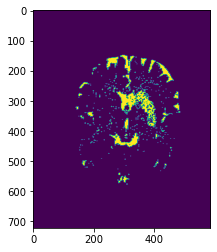

In [9]:
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((Cerveau.shape))
 
#plt.imshow(segmented_image)
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]<20:
            segmented_image[i,j]=0
        elif segmented_image[i,j]<140 and segmented_image[i,j]>=100:
            segmented_image[i,j]=120
        elif segmented_image[i,j]<180 and segmented_image[i,j]>=140:
            segmented_image[i,j]=179
        elif segmented_image[i,j]<200 and segmented_image[i,j]>=180:
            segmented_image[i,j]=250
            
Cluster2=segmented_image
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]!=250:
            Cluster2[i,j]=0
            
plt.imshow(Cluster2)

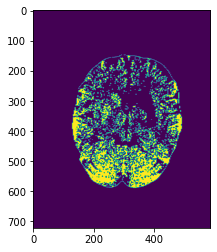

In [10]:
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((Cerveau.shape))
 
#plt.imshow(segmented_image)
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]<20:
            segmented_image[i,j]=0
        elif segmented_image[i,j]<140 and segmented_image[i,j]>=100:
            segmented_image[i,j]=120
        elif segmented_image[i,j]<180 and segmented_image[i,j]>=140:
            segmented_image[i,j]=179
        elif segmented_image[i,j]<200 and segmented_image[i,j]>=180:
            segmented_image[i,j]=250
            
Cluster3=segmented_image
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]!=120:
            Cluster3[i,j]=0
            
plt.imshow(Cluster3)

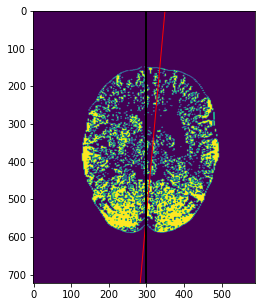

In [11]:
x1=[300,300]
y1=[0,800]


plt.figure(figsize=(5,5))

plt.plot(x, y, color="red", linewidth=1)
plt.plot(x1,y1,color="k",linewidth=2)
V=rotate(Cluster3, angle=np.arctan(11))
plt.imshow(V)


<ipython-input-12-94a299af6637>:15: RuntimeWarning: divide by zero encountered in divide
  Diff_rel3=(res3-r3)/Cluster3
<ipython-input-12-94a299af6637>:15: RuntimeWarning: invalid value encountered in divide
  Diff_rel3=(res3-r3)/Cluster3


<Figure size 360x360 with 0 Axes>

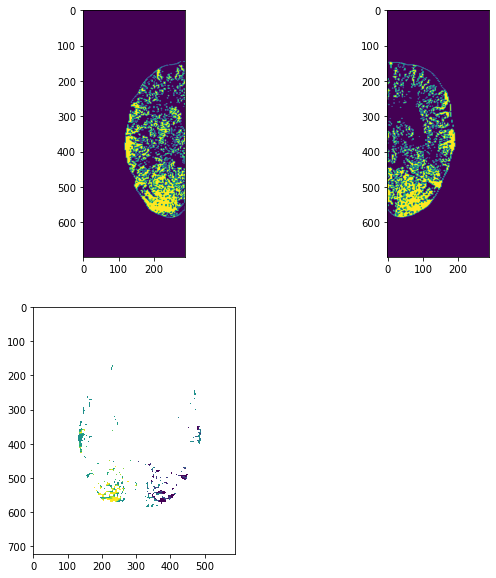

In [12]:
plt.figure(figsize=(5,5))
V3=rotate(Cluster3, angle=np.arctan(11))

cropped3 = V3[:700, 12:300]
croppedO3 = V3[:700, 300:]

res3 = resize(croppedO3, (722, 588))
r3 = resize(cropped3, (722, 588))

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(cropped3)
plt.subplot(2,2,2)
plt.imshow(croppedO3)
Diff_rel3=(res3-r3)/Cluster3
plt.subplot(2,2,3)
plt.imshow(Diff_rel3)

<ipython-input-13-8b764fdffe23>:15: RuntimeWarning: divide by zero encountered in divide
  Diff_rel2=(res2-r2)/Cluster2
<ipython-input-13-8b764fdffe23>:15: RuntimeWarning: invalid value encountered in divide
  Diff_rel2=(res2-r2)/Cluster2


<Figure size 360x360 with 0 Axes>

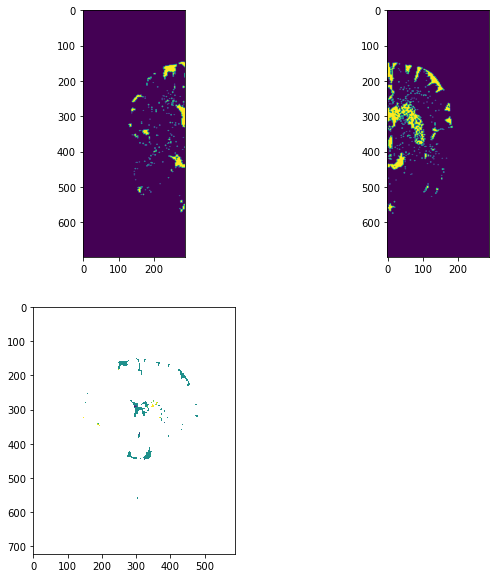

In [13]:
plt.figure(figsize=(5,5))
V2=rotate(Cluster2, angle=np.arctan(11))

cropped2 = V2[:700, 12:300]
croppedO2 = V2[:700, 300:]

res2 = resize(croppedO2, (722, 588))
r2 = resize(cropped2, (722, 588))

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(cropped2)
plt.subplot(2,2,2)
plt.imshow(croppedO2)
Diff_rel2=(res2-r2)/Cluster2
plt.subplot(2,2,3)
plt.imshow(Diff_rel2)


<ipython-input-14-a011469aceea>:15: RuntimeWarning: divide by zero encountered in divide
  Diff_rel1=(res-r)/Cluster1
<ipython-input-14-a011469aceea>:15: RuntimeWarning: invalid value encountered in divide
  Diff_rel1=(res-r)/Cluster1


<Figure size 360x360 with 0 Axes>

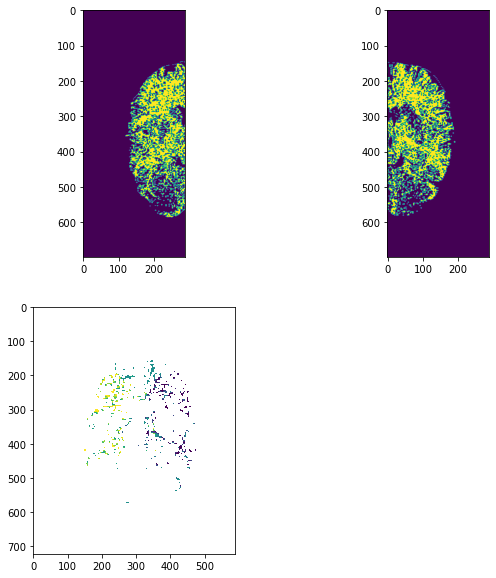

In [14]:
plt.figure(figsize=(5,5))
V1=rotate(Cluster1, angle=np.arctan(11))

cropped1 = V1[:700, 12:300]
croppedO1 = V1[:700, 300:]

res = resize(croppedO1, (722, 588))
r = resize(cropped1, (722, 588))

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(cropped1)
plt.subplot(2,2,2)
plt.imshow(croppedO1)
Diff_rel1=(res-r)/Cluster1
plt.subplot(2,2,3)
plt.imshow(Diff_rel1)
